In [2]:
import pandas as pd
chomage = pd.read_csv("donnees/unrate.csv")
chomage.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [3]:
chomage.shape

(841, 2)

In [4]:
#verifie la manquante des données 
print("affiche des nombre de donnees manquantes")
chomage.isnull().sum()

affiche des nombre de donnees manquantes


DATE      0
UNRATE    0
dtype: int64

In [5]:
#Introduction•Lire 'unrate.csv' dans un dataframe et assigner ce résultat à la variable unrate.•Utiliser la fonction pandas.to_datetime() pour convertir la colonne 'DATE' en valeurs datetime.
import datetime as dt
#convertir 'DATE' en type Datetime
pd.to_datetime(chomage['DATE'])


0     1948-01-01
1     1948-02-01
2     1948-03-01
3     1948-04-01
4     1948-05-01
         ...    
836   2017-09-01
837   2017-10-01
838   2017-11-01
839   2017-12-01
840   2018-01-01
Name: DATE, Length: 841, dtype: datetime64[ns]

In [6]:
#Introduction•Lire 'unrate.csv' dans un dataframe et assigner ce résultat à la variable unrate.•Utiliser la fonction pandas.to_datetime() pour convertir la colonne 'DATE' en valeurs datetime.•Afficher les 12 premières valeurs de unratecorrespondant à une année entière.
print("12 valeurs de unrate correspondant à une année")
#chomage.head(12)
a1948 =chomage.loc[(chomage['DATE'] > '1948-01-01') & (chomage['DATE'] <= '1948-12-31')]
a1948

12 valeurs de unrate correspondant à une année


,DATE,UNRATE
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7
10,1948-11-01,3.8


In [20]:
from datetime import datetime as dt
#utilise pkg datetime dans datetime
#fonc strptime("string_date", "str_format" ) ex: "%Y-%m-%d" :  can read strings with date and time information and convert them to datetime objects
#fonc strftime : converts datetime objects back into strings.
# applique methode strptime s/chaque valeur du  col 'DATE', suite extrait mois, et est affecté dans nv col 'MONTH'
chomage['MONTH'] = chomage['DATE'].apply(lambda m : dt.strptime(m, "%Y-%m-%d").month)
#chomage['C_MONTH'] = pd.to_datetime(chomage['DATE']).dt.month
month_chr = {'Jan', 'Feb', 'Mar', 'Avr', 'Mai', 'Jui', 'Jul', 'Aou', 'Sep', 'Oct', 'Nov', 'Dec' }
chomage.head()

,DATE,UNRATE,MONTH,YEAR,C_MONTH
0,1948-01-01,3.4,1,1948,1
1,1948-02-01,3.8,2,1948,2
2,1948-03-01,4.0,3,1948,3
3,1948-04-01,3.9,4,1948,4
4,1948-05-01,3.5,5,1948,5


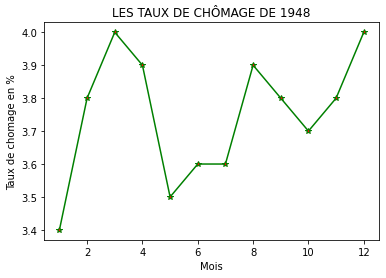

In [15]:
import matplotlib.pyplot as plt
#use fonc figure() mermet de creer une nouvelle figure; vierge
anne1948 = chomage.loc[(chomage['DATE'] >= '1948-01-01') & (chomage['DATE'] <= '1948-12-31')]
plt.figure()
# cmd subplot(111) permet de creer un grill de 1*1 puis placer le graphique à la ps 1
plt.subplot(111)
plt.plot(anne1948["MONTH"], anne1948["UNRATE"], marker="*", color='green', markerfacecolor="red")
plt.title("Les taux de chômage de 1948".upper())
plt.xlabel("Mois")
plt.ylabel("Taux de chomage en %")
plt.xticks(np.arange(0,13), month_chr)
plt.show()



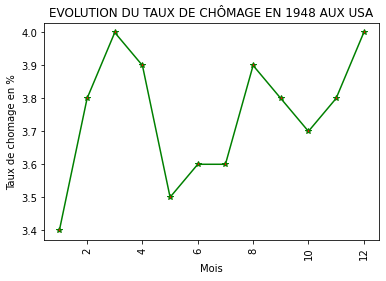

In [25]:
# Utiliser la fonction pyplot.xticks() pour créer une rorationde 90
import matplotlib.pyplot as plt

anne1948 = chomage.loc[(chomage['DATE'] >= '1948-01-01') & (chomage['DATE'] <= '1948-12-31')]
plt.figure()
plt.subplot()
plt.plot(anne1948["MONTH"], anne1948["UNRATE"], marker="*", color='green', markerfacecolor="red")
plt.title("Evolution du taux de chômage en 1948 aux USA".upper())
plt.xlabel("Mois")
plt.ylabel("Taux de chomage en %")
plt.xticks(rotation='vertical') #rotation 90°
plt.show()

In [26]:
import matplotlib.pyplot as plt
import numpy as np

#creer 6 grap vide s/2 ligne et 3 col
fig, axs = plt.subplots(2, 3, figsize=(15,11))

#creer 2 DF correspondé annee 1948 - 1949
an1948 =chomage.loc[(chomage['DATE'] > '1948-01-01') & (chomage['DATE'] <= '1948-12-31')]
an1949 =chomage.loc[(chomage['DATE'] > '1949-01-01') & (chomage['DATE'] <= '1949-12-31')]

#generer list sticks de 0 - 12, step 4, les etiquette s/axe mois

xtisks = np.arange(1,13, month_chr)
#AXE 1 - l1, c1
#Sol1: utilise donnees s/DF an1948
axs[0,0].plot(an1948["MONTH"], an1948["UNRATE"], marker="*", color='green', markersize=2)
#sol2: utilise donnees s/DF chomage et localise/ligne 0-11
axs[0,0].plot(chomage["MONTH"][0:11], chomage["UNRATE"][0:11], marker="*", color='green', markersize=2)
axs[0,0].set_xlabel("Mois")
axs[0,0].set_xticks(xtisks) #creer stisk axe x av list xticks généré par arange
axs[0,0].set_ylabel("Taux en %")

#axe2 - l1, c2
axs[0,1].plot(an1948["MONTH"], an1948["UNRATE"], marker=".", color='red', markersize=2)
axs[0,1].set_title("Taux de chômage en 1948".upper())
axs[0,1].set_xlabel("Mois")
axs[0,1].set_ylabel("Taux en %")

axs[0,2].plot(an1948["MONTH"], an1948["UNRATE"], marker="v", color='blue', markersize=2)
axs[0,2].set_xlabel("Mois")
axs[0,2].set_ylabel("Taux en %")

#AXE2
axs[1,0].plot(an1949["MONTH"], an1949["UNRATE"], marker="*", color='black', markersize=2)
axs[1,0].set_xlabel("Mois")
axs[1,0].set_ylabel("Taux en %")

# axs[1,1].plot(an1949["MONTH"], an1949["UNRATE"], marker=".", color='yellow', markersize=2)
#soit
axs[1,1].plot(chomage["MONTH"][12:23], chomage["UNRATE"][12:23], marker=".", color='yellow', markersize=2)
axs[1,1].set_title("Taux de chômage en 1949".upper())
axs[1,1].set_xlabel("Mois")
axs[1,1].set_ylabel("Taux en %")

axs[1,2].plot(an1949["MONTH"], an1949["UNRATE"], marker="v", color='violet', markersize=2)
axs[1,2].set_xlabel("Mois")
axs[1,2].set_ylabel("Taux en %")
plt.show()

TypeError: unsupported operand type(s) for /: 'int' and 'set'

# 8. Superposition de courbes

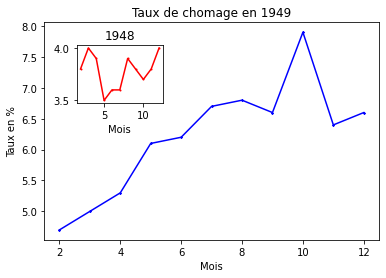

In [19]:
import matplotlib.pyplot as plt
fig, axe_main = plt.subplots()
plt.xsticks(rotation = 90)
#axe_principal
axe_main.plot(an1949["MONTH"], an1949["UNRATE"], marker="*", color='blue', markersize=2)
axe_main.set_title("Taux de chomage en 1949")
axe_main.set_xlabel("Mois")
axe_main.set_ylabel("Taux en %")

#axe_superposition
#ajout axe superposition
axe_inscrute = fig.add_axes([0.2, 0.6 , .2, .2])
axe_inscrute.plot(an1948["MONTH"], an1948["UNRATE"], marker=".", color='red', markersize=2)
axe_inscrute.set_title("1948")
axe_inscrute.set_xlabel("Mois")
#axe_inscrute.set_ylabel("Taux en %")
plt.show()

# 9. Ajouter plus de courbes

In [12]:
from datetime import datetime
#creer col 'YEAR' affecté = l'extrait année du col 'DATE'
chomage['YEAR'] = chomage['DATE'].apply(lambda d : dt.strptime(d,"%Y-%m-%d").year)

#creer un DF contient les données du 1948 - 1952
anne4852 = chomage.loc[(chomage['YEAR']>=1948) & (chomage['YEAR']<=1952)]
anne4852['YEAR'].value_counts()

1948    12
1949    12
1950    12
1951    12
1952    12
Name: YEAR, dtype: int64

# Ex 10

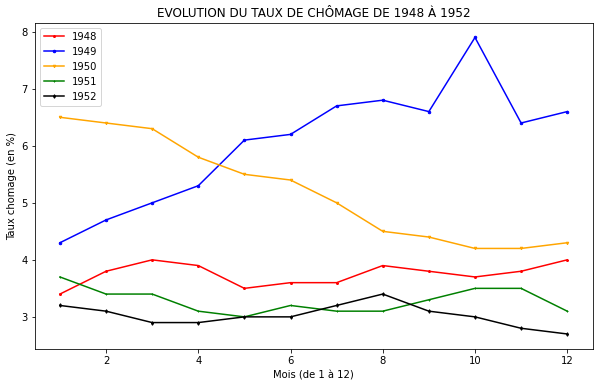

In [13]:
import matplotlib.pyplot as plt

#focntion retourne couleur pour année spécifique
def r_color(an) :
    tab_color = {1948:'red', 1949: 'b', 1950: 'orange', 1951 : 'green', 1952 : 'black'}
    return tab_color[an]

#focntion retourne marker du coube pour année spécifique
def r_marker(an) :
    tab_marker = {1948:'*', 1949: 'o', 1950: 'v', 1951 : '+', 1952 : 'd'}
    return tab_marker[an]
    
#creer un figure, avec figsize[10,6]
plt.figure(figsize=[10,6])
plt.subplot(111)

#creer une liste d'année du DF anne4852
l_year = anne4852['YEAR'].unique()

plt.title('Evolution du taux de chômage de 1948 à 1952'.upper())
plt.ylabel('Taux chomage (en %)')
plt.xlabel('Mois (de 1 à 12)')


for y in l_year : 
    #filtre les données par an et stocke à var tmp
    tmp = anne4852[anne4852['YEAR'] == y]
    # contruit coube axe x = month, axe y = taux, 
    # marker et couleur choisi de fonc r_marker, r_clolor selon d'annee
    #déclare label pour coube = y, ça sert à légend
    plt.plot(tmp['MONTH'], tmp['UNRATE'], marker = r_marker(y), color = r_color(y), markersize = 2.5, label = y)

plt.legend(loc='upper left') 
plt.show()